<table align="center"> 
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/jemutaic/IntroDeepLearning/blob/main/IntroDeepLearningTapiaConference.ipynb">
          <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table> 

#Tapia Conference: Introduction to deep learning

In [7]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

#What is a neural network? 


Neural networks are computing systems where computing systems learn underlying patterns in data by analyzing training samples. 



There are many types of deep learning networks but for today we will be specifically working with Convolutional Neural Networks (CNN's) 




## MNIST Dataset 
The MNIST dataset is a large database of handwritten digits commonly used for training image processing systems.

Let's load and explore the data. 


In [6]:
(train_images, train_labels), (test_images,test_labels) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
train_images, test_images = train_images[..., np.newaxis]/255.0, test_images[..., np.newaxis]/255.0

In [11]:
# train_images[0].shape
# train_images[0]

Let's plot a bunch of images and actually see what we're working with

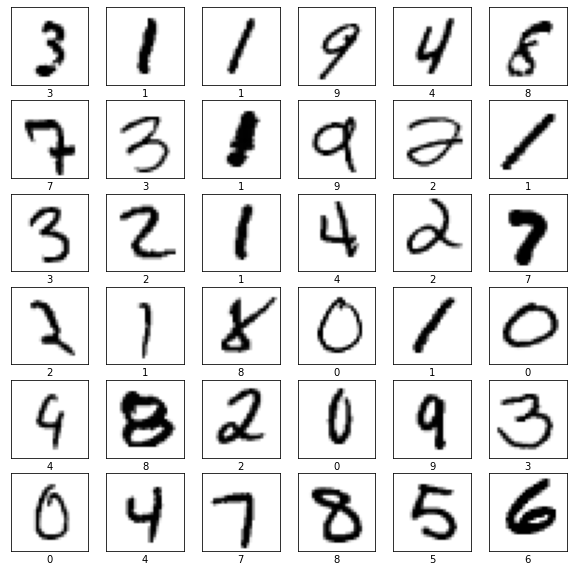

In [8]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])